In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("https://raw.githubusercontent.com/tech4alltraining/aiml/refs/heads/main/datasets/classification/adult.csv")
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Determine the number of rows and columns in the dataset
data.shape

(32561, 15)

In [ ]:
data.size

488415

In [ ]:
#Show the data types of each column
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
# Generate summary statistics using the describe() method.
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#to identify numeric features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features


['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [ ]:
#to identify categorical features
cate_feat = data.select_dtypes(include=['object']).columns.tolist()
cate_feat


['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [ ]:
# Display the distinct values for each categorical features
for col in cate_feat:
  print(data[col].unique())


['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Female' 'Male']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germ

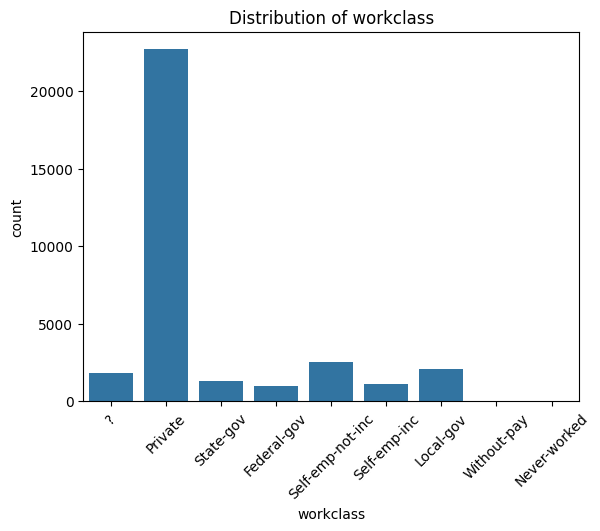

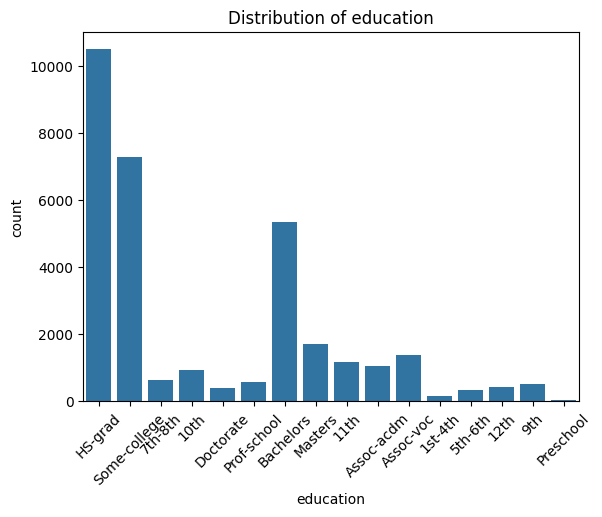

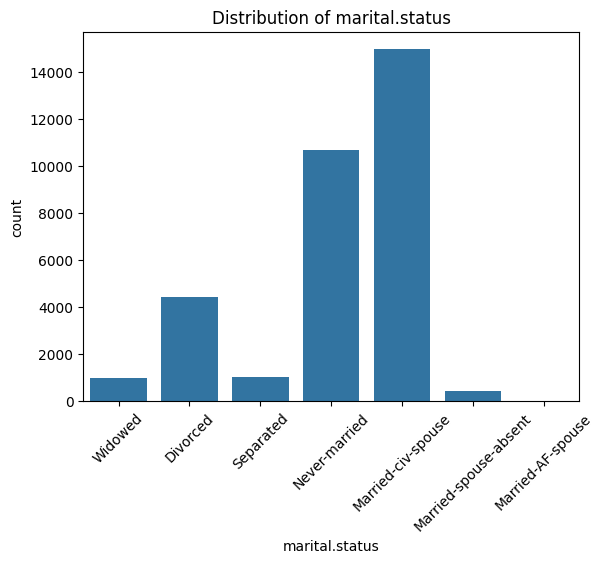

In [ ]:
#Visualize bar graphs for three categorical features, illustrating the distribution of samples across each category*. [Hint: Use Matplotlib or Seaborn.]

features = ['workclass', 'education', 'marital.status']
for feature in features:
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

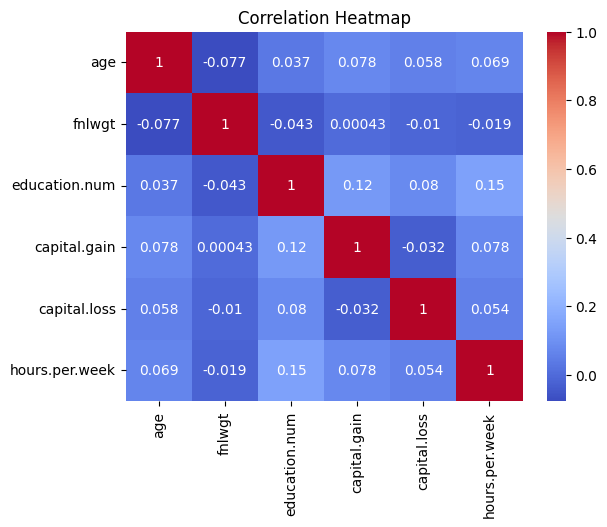

In [ ]:
#Plot the correlation matrix (using heatmap) to explore relationships between numerical features*
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
#annot=True(shows no inside the square)
#cmap(color map=shows which color scheme is used)
#red for negative correlation,blue for positive correlation

sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

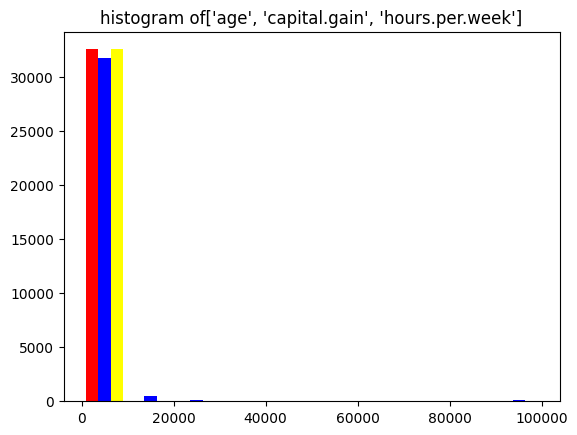

In [ ]:
#Examine the distribution of at least three numerical features*.
features=['age','capital.gain','hours.per.week']
plt.hist(data[features],color=['red','blue','yellow'])
plt.title(f'histogram of{features}')
plt.show()

In [ ]:
#APPLY DATA PREPROCESSING
# Handle missing values (represented as ? in the dataset). [Hint: Convert all values represented as ? into NaN, then proceed with handling missing values.]
data.replace('?', np.nan, inplace=True)

In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
# For categorical columns, fill null values with the most frequent category (mode) within each column
# Replace NaN with that value
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native.country'].fillna(data['native.country'].mode()[0], inplace=True)
data.isna().sum()

/tmp/ipython-input-838-2023518629.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
/tmp/ipython-input-838-2023518629.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
#or
for col in cate_feat:
    data[col].fillna(data[col].mode()[0], inplace=True)
data.isna().sum()

/tmp/ipython-input-839-288466314.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
data.duplicated().sum()

np.int64(24)

In [ ]:
#Drop unwanted columns
data.drop(['fnlwgt'],axis=1,inplace=True)

In [ ]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
#Remove duplicated rows
data.duplicated().sum()

np.int64(3591)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,32,Private,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


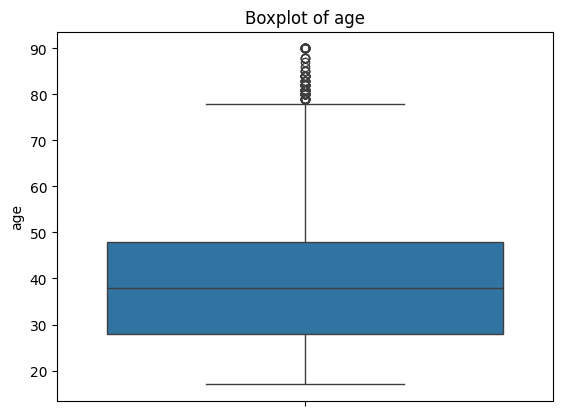

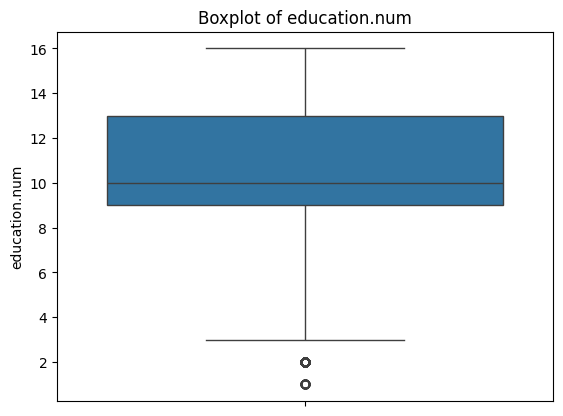

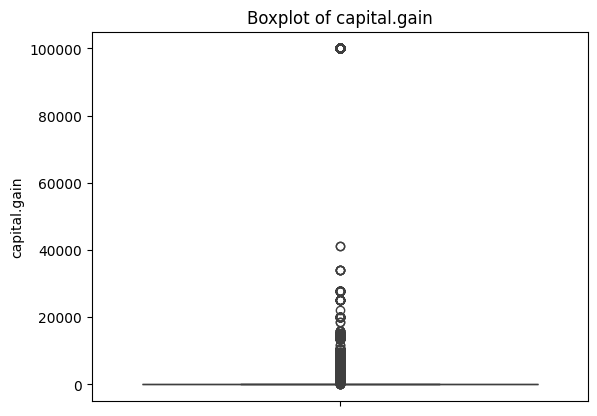

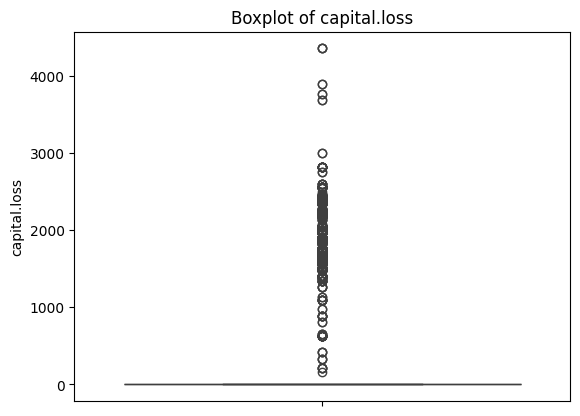

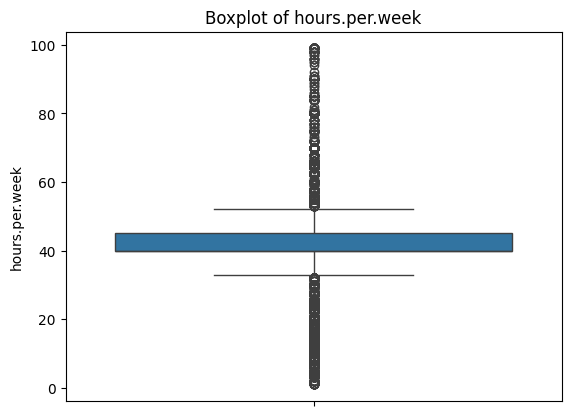

In [ ]:
#Detect and handle outliers
#detecting outliers using boxplot
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numeric_features:
  sns.boxplot(data[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

In [ ]:
#handle the outlier using iqr method
for col in numeric_features:
#Identify the quartiles
  q1,q3=np.percentile(data[col],[25,75])
#Calculate the interquartile range
  iqr=q3-q1
#Calculate the lower and upper bounds
  lower_bound=q1-(1.5*iqr)
  upper_bound=q3+(1.5*iqr)
  print(lower_bound, upper_bound)
# Drop the outliers
  data = data[(data[col] >= lower_bound)  & (data[col] <= upper_bound)]
data

-2.0 78.0
3.0 19.0
0.0 0.0
0.0 0.0
27.5 55.5


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [ ]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4233,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4234,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4235,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
4237,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32555,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


In [ ]:
#Perform Label Encoding for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

In [ ]:
data.dtypes

,0
age,int64
workclass,int64
education,int64
education.num,int64
marital.status,int64
occupation,int64
relationship,int64
race,int64
sex,int64
capital.gain,int64


In [ ]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,38,3,10,9,0,5,1,4,1,0,0,40,37,0
4233,53,3,1,7,2,5,0,2,1,0,0,40,37,0
4234,28,3,8,13,2,9,5,2,0,0,0,40,4,0
4235,37,3,11,14,2,3,5,4,0,0,0,40,37,0
4237,52,5,10,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,3,7,11,2,11,0,4,1,0,0,45,37,0
32555,53,3,11,14,2,3,0,4,1,0,0,40,37,1
32556,22,3,13,10,4,10,1,4,1,0,0,40,37,0
32557,27,3,6,12,2,12,5,4,0,0,0,38,37,0


In [ ]:
#Apply feature scaling where necessary.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in numeric_features:
  data[col]=scaler.fit_transform(data[[col]])

In [ ]:
data

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4232,-0.041083,3,10,-0.411908,0,5,1,4,1,0.0,0.0,-0.222367,37,0
4233,1.167921,3,1,-1.211029,2,5,0,2,1,0.0,0.0,-0.222367,37,0
4234,-0.847086,3,8,1.186335,2,9,5,2,0,0.0,0.0,-0.222367,4,0
4235,-0.121684,3,11,1.585896,2,3,5,4,0,0.0,0.0,-0.222367,37,0
4237,1.087321,5,10,-0.411908,2,3,0,4,1,0.0,0.0,0.708328,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,0.361918,3,7,0.387214,2,11,0,4,1,0.0,0.0,0.708328,37,0
32555,1.167921,3,11,1.585896,2,3,0,4,1,0.0,0.0,-0.222367,37,1
32556,-1.330688,3,13,-0.012347,4,10,1,4,1,0.0,0.0,-0.222367,37,0
32557,-0.927686,3,6,0.786775,2,12,5,4,0,0.0,0.0,-0.594644,37,0


**WEEK 2 TASK**




In [ ]:
#Split the data into training and testing sets (e.g., 80:20 split) and Show sample size(s) of each split.
from sklearn.model_selection import train_test_split
X=data.drop('income', axis=1)
y=data['income']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(data.shape)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19093, 14)
(19093, 13)
(19093,)
(15274, 13)
(3819, 13)
(15274,)
(3819,)


In [ ]:
#Train the following classification models:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #CREATE MODEL
lr.fit(X_train,y_train) #TRAIN THE MODEL


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_test

,income
24055,0
9322,0
4676,1
21405,1
15093,1
...,...
7828,0
4559,0
12222,1
4412,1


In [ ]:
y_pred=lr.predict(X_test) #PREDICT
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
#evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.8159203980099502
[[2911  154]
 [ 549  205]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3065
           1       0.57      0.27      0.37       754

    accuracy                           0.82      3819
   macro avg       0.71      0.61      0.63      3819
weighted avg       0.79      0.82      0.79      3819



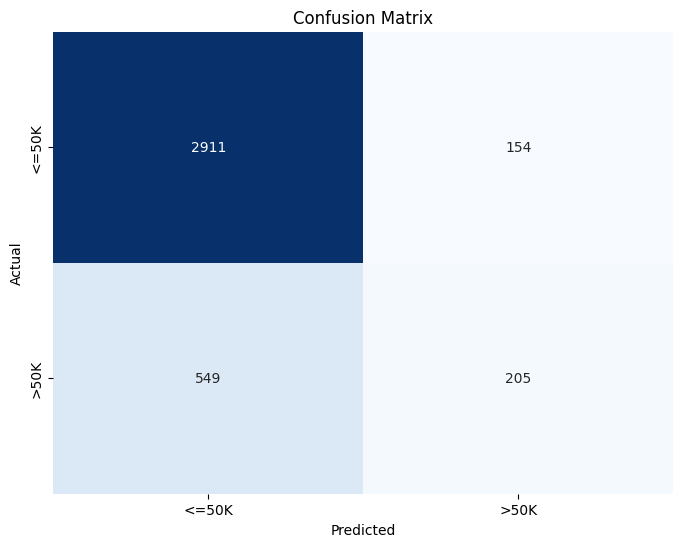

In [ ]:
#plot confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#k-Nearest Neighbors (kNN)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8167059439643886
[[2762  303]
 [ 397  357]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3065
           1       0.54      0.47      0.50       754

    accuracy                           0.82      3819
   macro avg       0.71      0.69      0.70      3819
weighted avg       0.81      0.82      0.81      3819



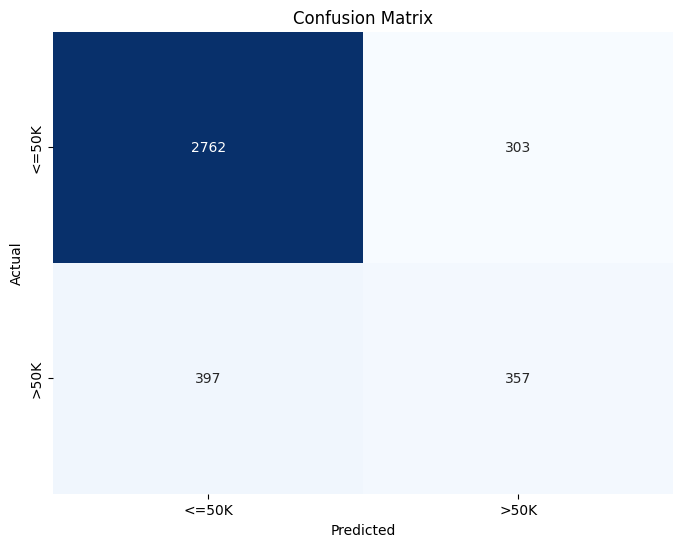

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8025661167844985
[[3065    0]
 [ 754    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3065
           1       0.00      0.00      0.00       754

    accuracy                           0.80      3819
   macro avg       0.40      0.50      0.45      3819
weighted avg       0.64      0.80      0.71      3819



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


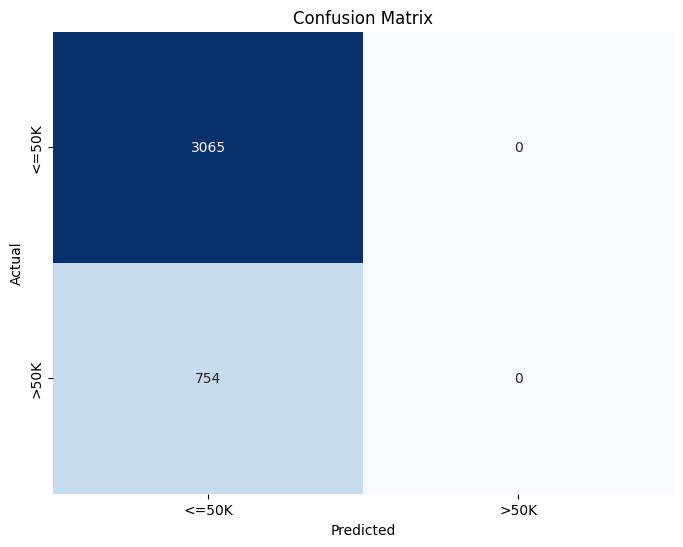

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred=nb.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7910447761194029
[[2535  530]
 [ 268  486]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      3065
           1       0.48      0.64      0.55       754

    accuracy                           0.79      3819
   macro avg       0.69      0.74      0.71      3819
weighted avg       0.82      0.79      0.80      3819



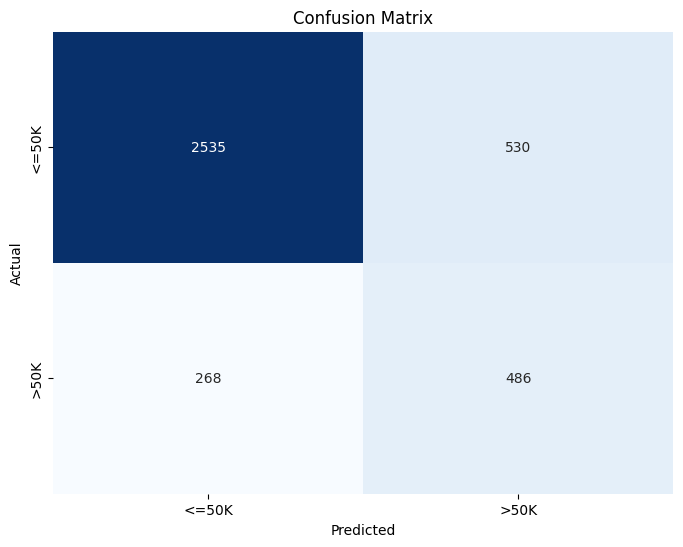

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7632888190625818
[[2620  445]
 [ 459  295]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3065
           1       0.40      0.39      0.39       754

    accuracy                           0.76      3819
   macro avg       0.62      0.62      0.62      3819
weighted avg       0.76      0.76      0.76      3819



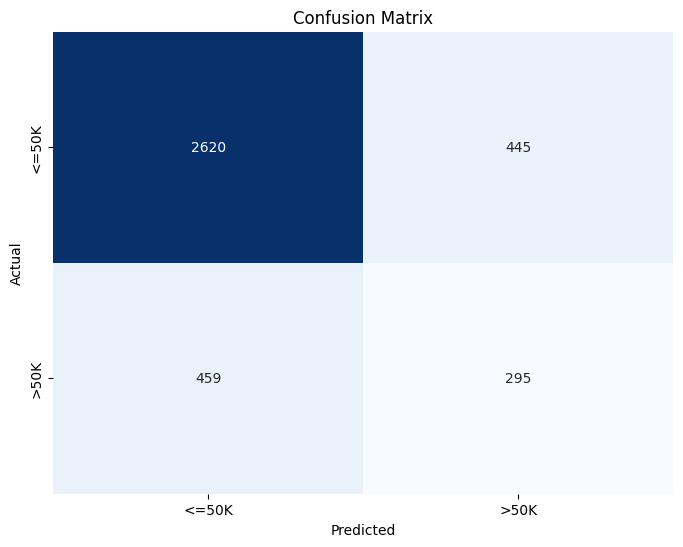

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8049227546478136
[[2742  323]
 [ 422  332]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3065
           1       0.51      0.44      0.47       754

    accuracy                           0.80      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg       0.80      0.80      0.80      3819



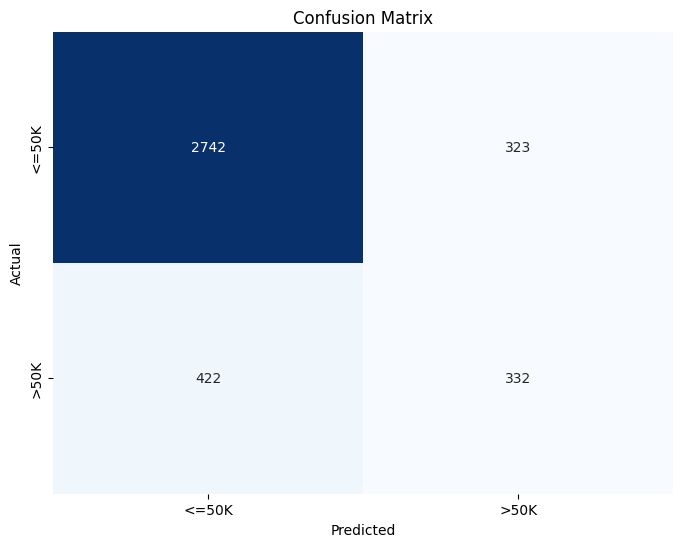

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
y_pred=mlp.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.838701230688662
[[2863  202]
 [ 414  340]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3065
           1       0.63      0.45      0.52       754

    accuracy                           0.84      3819
   macro avg       0.75      0.69      0.71      3819
weighted avg       0.83      0.84      0.83      3819



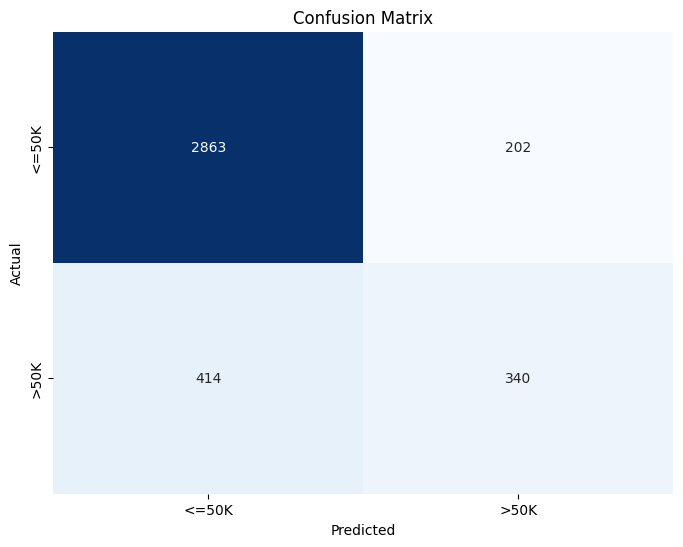

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_preed=gbc.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.838701230688662
[[2863  202]
 [ 414  340]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3065
           1       0.63      0.45      0.52       754

    accuracy                           0.84      3819
   macro avg       0.75      0.69      0.71      3819
weighted avg       0.83      0.84      0.83      3819



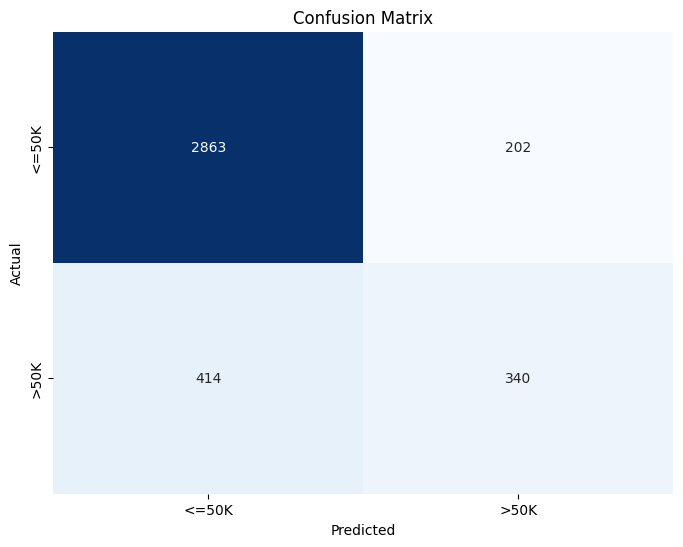

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# XGBClassifier
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
#evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8350353495679497
[[2807  258]
 [ 372  382]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3065
           1       0.60      0.51      0.55       754

    accuracy                           0.84      3819
   macro avg       0.74      0.71      0.72      3819
weighted avg       0.83      0.84      0.83      3819



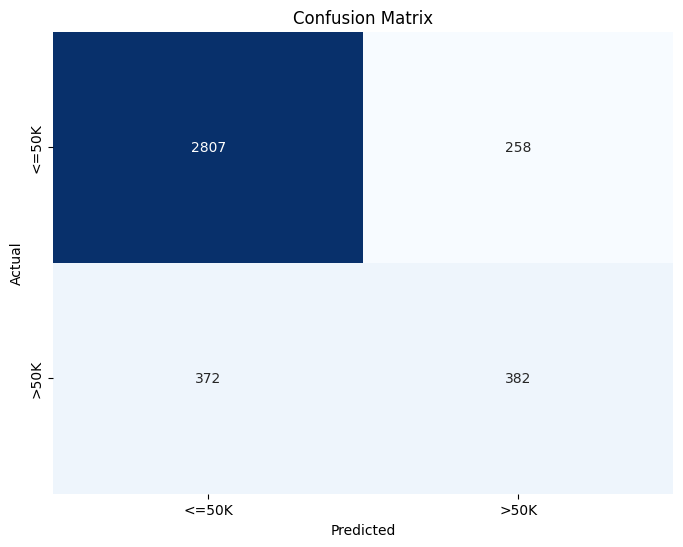

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#perform hyperparameter manual tuning
# k-Nearest Neighbors (kNN): Try different values for n_neighbors (e.g., 3, 5, 7, 9)
k=[3,5,7,9]
for values in k:
 kn = KNeighborsClassifier(n_neighbors=values)
 kn.fit(X_train,y_train)
 y_pred=kn.predict(X_test)
# Accuracy,Confusion Matrix and Classification Report
 print(accuracy_score(y_test,y_pred))
 print(classification_report(y_test,y_pred))

0.8025661167844985
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3065
           1       0.50      0.48      0.49       754

    accuracy                           0.80      3819
   macro avg       0.69      0.68      0.68      3819
weighted avg       0.80      0.80      0.80      3819

0.8167059439643886
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3065
           1       0.54      0.47      0.50       754

    accuracy                           0.82      3819
   macro avg       0.71      0.69      0.70      3819
weighted avg       0.81      0.82      0.81      3819

0.8235140089028542
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3065
           1       0.56      0.47      0.51       754

    accuracy                           0.82      3819
   macro avg       0.72      0.69      0.70      3819
weighted avg     

k=7 has has more accuracy=82.35%

In [ ]:
#Support Vector Machine (SVM): Try different kernel types (e.g., 'linear','rbf', 'poly')
kernel=['linear','rbf','poly']
for k in kernel:
  sm =SVC(kernel=k,class_weight='balanced')
  sm.fit(X_train,y_train)
  y_pred=sm.predict(X_test)
  # Accuracy,Confusion Matrix and Classification Report
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))

0.7090861482063368
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      3065
           1       0.38      0.78      0.52       754

    accuracy                           0.71      3819
   macro avg       0.66      0.74      0.65      3819
weighted avg       0.82      0.71      0.74      3819

0.7020162346163917
              precision    recall  f1-score   support

           0       0.93      0.68      0.78      3065
           1       0.38      0.81      0.52       754

    accuracy                           0.70      3819
   macro avg       0.66      0.74      0.65      3819
weighted avg       0.82      0.70      0.73      3819

0.7255826132495418
              precision    recall  f1-score   support

           0       0.93      0.71      0.81      3065
           1       0.40      0.78      0.53       754

    accuracy                           0.73      3819
   macro avg       0.67      0.75      0.67      3819
weighted avg     

here poly has better accuracy


In [ ]:
#Random Forest: Try different n_estimators (e.g., 50, 100, 150)
n_est=[50,100,150]
for val in n_est:
 rf = RandomForestClassifier(n_estimators=val, random_state=42)
 rf.fit(X_train, y_train)
 y_pred=rf.predict(X_test)
 # Accuracy,Confusion Matrix and Classification Report
 print(accuracy_score(y_test,y_pred))
 print(classification_report(y_test,y_pred))

0.8085886357685258
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg       0.80      0.81      0.80      3819

0.8104215763288819
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.70      0.67      0.68      3819
weighted avg       0.80      0.81      0.80      3819

0.8080649384655669
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3065
           1       0.52      0.45      0.48       754

    accuracy                           0.81      3819
   macro avg       0.69      0.67      0.68      3819
weighted avg     

n_extimators=100 has better accuracy

In [ ]:
#Compare the classifiers based on performance metrics

| **Model**              | **Hyperparameter(s)**       | **Accuracy (%)** | **Precision** | **Recall** | **F1-Score** |
| ---------------------- | --------------------------- | ---------------- | ------------- | ---------- | ------------ |
| Logistic Regression    | —                           | 81.5             | 0.79          | 0.82       | 0.79         |
| kNN                    |k=3                          | 80.2             | 0.80          |0.80        |0.80          |          
| kNN                    | k = 5                       | 81.6             | 0.81          | 0.82       | 0.81         |
| kNN                    | k = 7                       | 82.35            | 0.81          | 0.82       | 0.82         |
| kNN                    | k = 9                       | 82.32            | 0.81          | 0.82       | 0.82         |
| SVM                    | kernel = 'linear'           | 70.9             | 0.82          | 0.71       | 0.74         |
| SVM                    | kernel = 'rbf'              | 70.2             | 0.82          | 0.70       | 0.73         |
| SVM                    | kernel = 'poly'             |72.5              | 0.83          | 0.73       |0.75          |
| Decision Tree          | ---          | 76.3         | 0.76             | 0.76          | 0.76       |
| Random Forest          | n_estimators = 50           | 80.8             | 0.80          | 0.81       | 0.80         |
| Random Forest          | n_estimators = 100          | 81.0             | 0.80          | 0.81       | 0.80         |
| Random Forest          | n_estimators = 150          | 80.8             | 0.80          | 0.81       | 0.80         |
| Naive Bayes (Gaussian) | —                           | 79.1             | 0.82          | 0.79       | 0.80         |
| MLP Classifier         | ---          | 83.0         | 0.81             | 0.83          | 0.81       |
| Gradient Boosting      | ---          | 83.8         | 0.83             | 0.84          | 0.83       |
| XGBoost                | ---          | 83.5         | 0.83             | 0.84          | 0.83       |


Multiple machine learning models were evaluated for income classification using metrics such as Accuracy, Precision, Recall, and F1-Score.

The dataset had non-linear patterns and slight class imbalance, requiring models that balance accuracy and generalization.

Best Models: Gradient Boosting and XGBoost delivered the highest performance across all metrics:

Accuracy: 83.5-83.8%

F1-Score: 0.83 (well-balanced across classes)

MLP Classifier also showed strong generalization with:

Accuracy: 83.0%

F1-Score: 0.81

Moderate Performers: k-Nearest Neighbors (k=7, 9): Reliable with F1-Score: 0.82; simple but effective baseline model.

Logistic Regression: Competitive accuracy (81.5%) with good interpretability.

Underperformers: Support Vector Machines (SVM): Lower accuracy (~70 -72%) and poor recall due to possible feature scaling issues or class imbalance.

Decision Tree: Prone to overfitting; accuracy limited to ~76%.

Conclusion: Gradient Boosting and XGBoost are recommended as the final models due to their high accuracy, balanced precision-recall, and robustness across different performance metrics. They are most suitable for deployment in this income classification



In [ ]:
#Any specific observations about the data or models?

In this project, multiple machine learning models were built, trained, and evaluated to predict whether an individual earns more than 50K per year based on demographic and employment-related features.

Through extensive experimentation and comparative analysis, Gradient Boosting and XGBoost emerged as the most effective models, achieving high accuracy and balanced classification performance.

These models demonstrated the ability to generalize well, especially in handling class imbalance and non-linear relationships within the data, making them highly suitable for real-world deployment in income classification systems.